# Mathematics for signal processing notebook
Guillaume TOCHON (<guillaume.tochon@lrde.epita.fr>) & Ã‰lodie PUYBAREAU (<elodie@lrde.epita.fr>)

In [1]:
# Import all custom-made functions
import MASI
# Import all the usual stuff
import numpy as np
pi = np.pi # coz' I'm lazy af
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline
# Shut warnings off (I'm a terrible person)
import warnings
warnings.filterwarnings('ignore')

## Fourier series

In [2]:
# define time vector
T = 1 # overall period of generated signal
f = 1/T # corresponding frequency
Tech = 0.001 # sampling period
t_min = -2*T/3
t = np.arange(0,3*T,Tech)+t_min # time vector between t_min and t_max = t_min+3*T-Tech

 ### Convergence of the Fourier series
 
The Dirichlet theorem will tell us the conditions under which we are allowed to write $\displaystyle x(t) = a_0 + \sum_{n=1}^{+\infty} a_n \cos\left(2\pi\frac{n}{T}t\right) + b_n \sin\left(2\pi\frac{n}{T}t\right)$.  
But so far, let's define the partial sum of the Fourier series decomposition of $x$ as $\displaystyle S_N(t) = a_0 + \sum_{n=1}^{N} a_n \cos\left(2\pi\frac{n}{T}t\right) + b_n \sin\left(2\pi\frac{n}{T}t\right)$ in order to get a sneak peak of the convergence behavior of $S_N(t)$ toward $x(t)$.

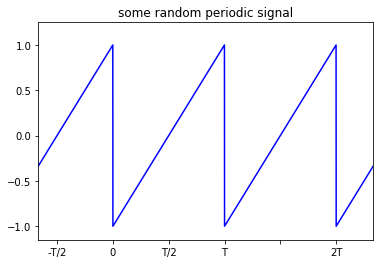

In [13]:
# A few signals for which we can compute the Fourier series decomposition
# -------------------------------
# comment/uncomment proper line

# # sawtooth with varying duty value
s = sp.signal.sawtooth(2*pi*t/T,width=1)

# # parabolic
# s = np.zeros(t.shape)
# s_T = lambda tt,delay=0: (2*(tt-delay)/T-1)**2
# s = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)

# exponential
# s = np.zeros(t.shape)
# s_T = lambda tt,delay=0: np.exp(((tt-delay)/T)**2)
# s = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)


plt.plot(t,s,'b')
plt.xticks(np.linspace(-T/2,2*T,6),('-T/2','0','T/2','T','','2T'))
plt.xlim((t.min(),t.max()))
plt.ylim((s.min()-0.15*np.abs(s.min()),1.25*s.max()))
plt.title('some random periodic signal')
plt.show()

In [14]:
app,coef = MASI.Fourier_series_decomposition(s,t,T,Tech,20)

In [15]:
MASI.visualize_cvg_Fourier_approx(s,t,T,coef)

### Gibbs Phenomenon

<img src="http://fr.web.img3.acsta.net/r_640_256/newsv7/17/05/23/11/38/278459.jpg" width="400"> | <img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Josiah_Willard_Gibbs_-from_MMS-.jpg" width="120">
:---: | :---:
$\uparrow$ | $\uparrow$
No, not this one... | Yeah, this one

In [8]:
# A few discontinuous signals to illustrate Gibbs phenomenon
# -------------------------------
# comment/uncomment proper line

# square signal
s = 0.5+0.5*signal.square(t*2*pi/T)

# sawtooth
# s = sp.signal.sawtooth(2*pi*t/T,width=1)

# parabolic (OK, this one is not discontinuous)
# s = np.zeros(t.shape)
# s_T = lambda tt,delay=0: (2*(tt-delay)/T-1)**2
# s = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)

# exponential
# s = np.zeros(t.shape)
# s_T = lambda tt,delay=0: np.exp(((tt-delay)/T)**2)
# s = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)

In [9]:
app,coef = MASI.Fourier_series_decomposition(s,t,T,Tech,100)
MASI.visualize_Gibbs_phenomenon(s,t,T,coef)

### Parseval equality

Parseval equality states that the energy $E_x$ of a ($T-$periodic) signal computed in the "temporal" domain $\bigl($_i.e._ $\displaystyle E_x = \frac{1}{T}\int_0^T |x(t)|^2 dt\bigl)$ is equal to the energy of the signal computed in the "frequency" domain $\bigl(\displaystyle \sum_{n \in \mathbb{Z}} |c_n|^2$, with $|c_n|^2$ being by  definition the energy of the n$^\text{th}$ order harmonic$\bigl)$ :
$$\frac{1}{T}\int_0^T |x(t)|^2 dt = \sum_{n=-\infty}^{+\infty} |c_n|^2 = a_0^2 + \frac{1}{2}\sum_{n=1}^{+\infty} \left(a_n^2 + b_n^2\right) $$  
Let's check it.

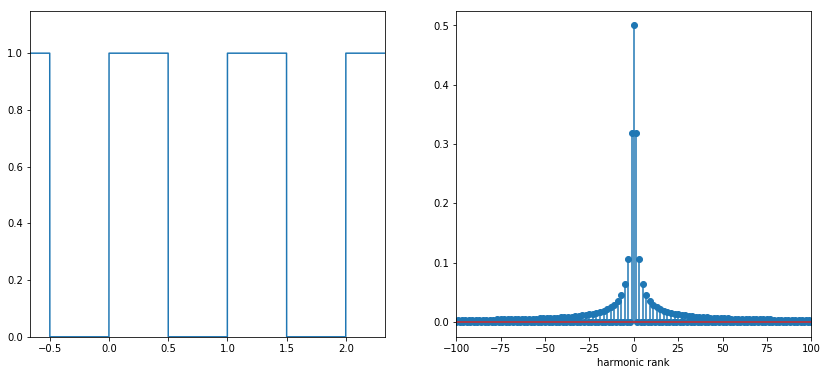

In [16]:
# A few signals to check Parseval equality
# -------------------------------
# comment/uncomment proper line

# square signal
s = 0.5+0.5*signal.square(t*2*pi/T)

# sawtooth
# s = sp.signal.sawtooth(2*pi*t/T,width=1)

# parabolic (OK, this one is not discontinuous)
# s = np.zeros(t.shape)
# s_T = lambda tt,delay=0: (2*(tt-delay)/T-1)**2
# s = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)

# exponential
# s = np.zeros(t.shape)
# s_T = lambda tt,delay=0: np.exp(((tt-delay)/T)**2)
# s = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)
# s -= s.mean()

# Compute a shitload of complex Fourier coefficients
NbHarmonics = 100
app,coef = MASI.Fourier_series_decomposition(s,t,T,Tech,NbHarmonics)
spectrum = np.abs(np.hstack((coef[::-1],coef[1:])))
n_harmonics = np.arange(-NbHarmonics,NbHarmonics+1)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(t,s)
plt.xlim((t.min(),t.max()))
plt.ylim((s.min()-0.15*np.abs(s.min()),s.max()+0.15*np.abs(s.max())))
plt.subplot(122)
plt.stem(n_harmonics,spectrum)
plt.xlim((n_harmonics.min(),n_harmonics.max()))
plt.xlabel('harmonic rank')
# plt.yscale('log')
plt.show()

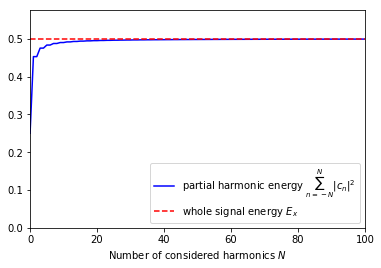

In [17]:
# signal energy over a period
Ex = (s[np.arange(0,T/Tech).astype(int)]**2).sum()*Tech/T
# retrieve partial energy of Fourier series decomposition
harmonic_energy = np.abs(coef)**2 # take modulus
harmonic_energy[1:]*=2 # double all harmonics
partial_energy = np.cumsum(harmonic_energy)
# plot partial energy vs total energy
plt.plot(np.arange(0,coef.size),partial_energy,'b',label=r'partial harmonic energy $\sum_{n=-N}^N |c_n|^2$')
plt.plot(np.arange(0,coef.size),Ex*np.ones(coef.size),'--r',label=r'whole signal energy $E_x$')
plt.xlim((0,NbHarmonics))
plt.xlabel(r'Number of considered harmonics $N$')
plt.ylim((0,1.15*Ex))
plt.legend(loc='lower right')
plt.show()

### Decreasing behavior of the Fourier coefficients

It is possible to show (Riemman-Lebesgue lemma + Fourier coefficients of the derivative of a function) that :
- $ |c_n| \rightarrow 0$ as $n \rightarrow +\infty$ (so do $a_n$ and $b_n$) as long as $x$ is at least piecewise continuous.
- If $x$ and all its derivatives $x', x^{(2)}, \dots, x^{(k-1)}$ are continuous and $x^{(k)}$ is piecewise continuous for some $k>1$, then $|c_n| \underset{n \rightarrow +\infty}{\sim} \left(\displaystyle \frac{1}{n^{k+1}}\right)$  
It (should) actually make a lot of sense : the more regular/smooth a signal $x$, the fewer the amount of hight frequencies needed to reconstruct it.

In [18]:
# decreasing behavior of the Fourier coefficients
# (At this point, who still cares about some nicely written pieces of code anyway???)
NbHarmonics = 50
xsq = 0.5+0.5*signal.square(t*2*pi/T)
app,coeff_xsq = MASI.Fourier_series_decomposition(xsq,t,T,Tech,NbHarmonics)
xsaw = sp.signal.sawtooth(2*pi*t/T,width=0.5)
app,coeff_xsaw = MASI.Fourier_series_decomposition(xsaw,t,T,Tech,NbHarmonics)
xpar = np.zeros(t.shape)
s_T = lambda tt,delay=0: (2*(tt-delay)/T-1)**2
xpar = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)
app,coeff_xpar = MASI.Fourier_series_decomposition(xpar,t,T,Tech,NbHarmonics)
xexp = np.zeros(t.shape)
s_T = lambda tt,delay=0: np.exp(((tt-delay)/T)**2)
xexp = s_T(t,-T)*(t<0) + s_T(t)*((t>=0)&(t<T)) + s_T(t,T)*((t>=T)&(t<2*T)) + s_T(t,2*T)*(t>=2*T)
app,coeff_xexp = MASI.Fourier_series_decomposition(xexp,t,T,Tech,NbHarmonics)

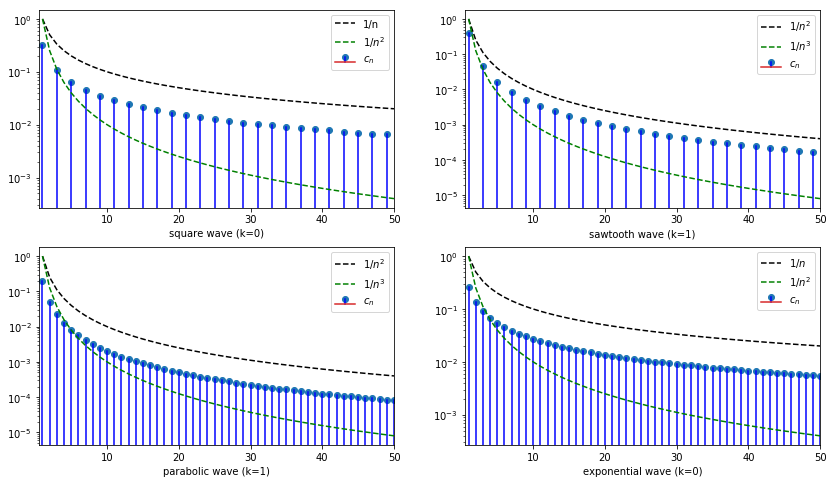

In [19]:
n_harmonics = np.arange(1,NbHarmonics+1)
plt.figure(figsize=(14,8))
#---------------
plt.subplot(221)
plt.stem(n_harmonics[::2],np.abs(coeff_xsq[1::2]),'b',label=r'$c_n$')
plt.plot(n_harmonics,1/n_harmonics,'--k',label='1/n')
plt.plot(n_harmonics,(1/n_harmonics)**2,'--g',label=r'$1/n^2$')
plt.xlim((0.5,NbHarmonics))
plt.xlabel('square wave (k=0)')
plt.yscale('log')
plt.legend(loc='upper right')
#---------------
plt.subplot(222)
plt.stem(n_harmonics[::2],np.abs(coeff_xsaw[1::2]),'b',label=r'$c_n$')
plt.plot(n_harmonics,(1/n_harmonics)**2,'--k',label=r'$1/n^2$')
plt.plot(n_harmonics,(1/n_harmonics)**3,'--g',label=r'$1/n^3$')
plt.xlim((0.5,NbHarmonics))
plt.xlabel('sawtooth wave (k=1)')
plt.yscale('log')
plt.legend(loc='upper right')
#---------------
plt.subplot(223)
plt.stem(n_harmonics,np.abs(coeff_xpar[1:]),'b',label=r'$c_n$')
plt.plot(n_harmonics,(1/n_harmonics)**2,'--k',label=r'$1/n^2$')
plt.plot(n_harmonics,(1/n_harmonics)**3,'--g',label=r'$1/n^3$')
plt.xlim((0.5,NbHarmonics))
plt.xlabel('parabolic wave (k=1)')
plt.yscale('log')
plt.legend(loc='upper right')
#---------------
plt.subplot(224)
plt.stem(n_harmonics,np.abs(coeff_xexp[1:]),'b',label=r'$c_n$')
plt.plot(n_harmonics,(1/n_harmonics),'--k',label=r'$1/n$')
plt.plot(n_harmonics,(1/n_harmonics)**2,'--g',label=r'$1/n^2$')
plt.xlim((0.5,NbHarmonics))
plt.xlabel('exponential wave (k=0)')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()